In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plotter
%matplotlib inline

In [14]:
dataset = pd.read_csv('./datasets/algerian-forest-fires-cleaned.csv')
dataset.head()

,day,month,year,Temperature,RH,WS,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Fire
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,False
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,False
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,False
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,False
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,False


In [15]:
# Remove Obvious Useless Feature
dataset.drop(['month', 'day', 'year', 'Fire'], axis = 1, inplace = True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   WS           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 19.1 KB


In [16]:
# Aliasing Independent and Dependent Features
X = dataset.iloc[:, :-1]
Y = dataset.iloc[:, -1]

<Axes: >

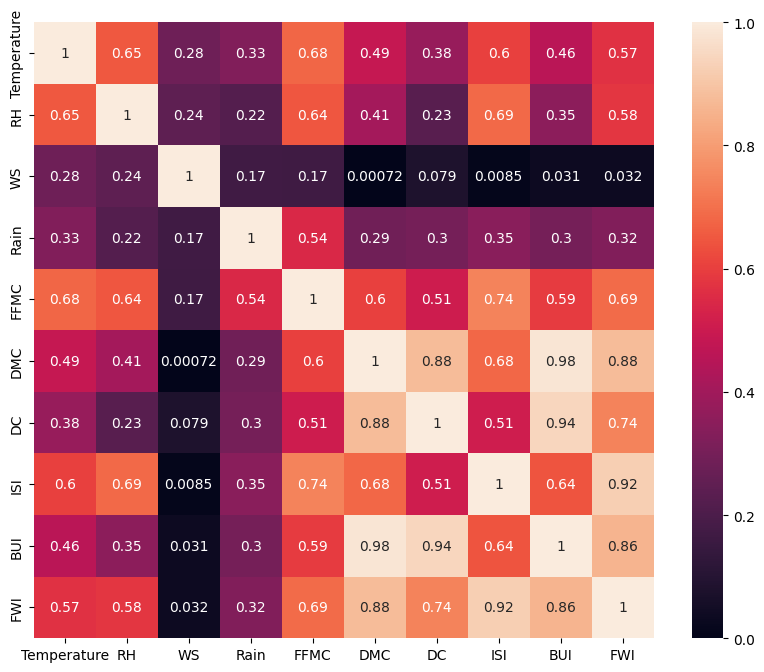

In [17]:
# Initial Feature Selection Using Correlation

plotter.figure(figsize = (10,8))
sns.heatmap(dataset.corr(numeric_only = True).abs(), vmin = 0, vmax = 1, annot = True)

In [18]:
# Handling MultiCollinearity - Since we are using Linear Regression without any Regularization

# Function to detect collinear Features
# In each row if correlation is > threshold then the other variable is a candidate to be dropped
# The row which estimates maximum other input features will be kept. Others are discarded

def collinearity_detector(Input_Features, threshold = 0.9):
    corr_matrix = Input_Features.corr().abs()
    max_sum = -10000
    collinear_features = []

    for col1 in corr_matrix.columns:
        sum = 0
        features = []
        for col2 in corr_matrix.columns:
            if col1 == col2:
                continue
            if corr_matrix[col1][col2] > threshold:
                sum += corr_matrix[col1][col2]
                features.append(col2)
        if sum!=0 and sum > max_sum:
            max_sum = sum
            collinear_features = features
    
    return collinear_features

In [19]:
collinear_features = collinearity_detector(X, 0.9)
print('Collinear Feaures:',collinear_features)

# Drop Collinear Features
for feature in collinear_features:
    X.drop(feature, axis = 1, inplace = True)

X.head()

Collinear Feaures: ['DMC', 'DC']


,Temperature,RH,WS,Rain,FFMC,ISI,BUI
0,29,57,18,0.0,65.7,1.3,3.4
1,29,61,13,1.3,64.4,1.0,3.9
2,26,82,22,13.1,47.1,0.3,2.7
3,25,89,13,2.5,28.6,0.0,1.7
4,27,77,16,0.0,64.8,1.2,3.9


In [20]:
# Dataset Split
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 13)

print('Train Data Size:',X_Train.shape)
print('Test Data Size:', X_Test.shape)

Train Data Size: (182, 7)
Test Data Size: (61, 7)


In [21]:
# Standardization of Input Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_Train)
X_Train_Norm = pd.DataFrame(scaler.transform(X_Train), columns = X_Train.columns)
X_Test_Norm = pd.DataFrame(scaler.transform(X_Test), columns = X_Test.columns)
X_Train_Norm.head()

,Temperature,RH,WS,Rain,FFMC,ISI,BUI
0,-0.038053,-0.130026,0.795473,-0.257160,-0.005539,-0.593758,-0.194357
1,1.070045,0.622322,-0.221689,-0.397289,0.596650,0.089297,1.640049
2,0.515996,-0.745584,0.117365,1.377680,0.021525,-0.640866,-0.625982
3,-0.315077,0.211950,-0.560743,-0.397289,0.495157,-0.169793,-0.079707
4,0.793021,0.553927,0.456419,-0.023611,-0.303251,-0.711526,1.377027


In [22]:
# Linear Regression Model Training (No Regularization)
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_Train_Norm, Y_Train)

# Predicting for Test Data and Visualizing
Y_Test_Predicted = model.predict(X_Test_Norm)
Y_Train_Predicted = model.predict(X_Train_Norm)

In [23]:
# Performance Metrics
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

print('For Test Dataset')
print('Mean Absolute Error:', mean_absolute_error(Y_Test, Y_Test_Predicted))
print('Root Mean Square Error:', root_mean_squared_error(Y_Test, Y_Test_Predicted))
print(f'R² Score: {round(100*r2_score(Y_Test, Y_Test_Predicted),2)}%')
print()

print('For Training Dataset')
print('Mean Absolute Error:', mean_absolute_error(Y_Train, Y_Train_Predicted))
print('Root Mean Square Error:', root_mean_squared_error(Y_Train, Y_Train_Predicted))
print(f'R² Score: {round(100*r2_score(Y_Train, Y_Train_Predicted),2)}%')

For Test Dataset
Mean Absolute Error: 0.52723476038491
Root Mean Square Error: 0.8095398023429885
R² Score: 98.58%

For Training Dataset
Mean Absolute Error: 0.6426838135174133
Root Mean Square Error: 1.277463692451908
R² Score: 97.19%


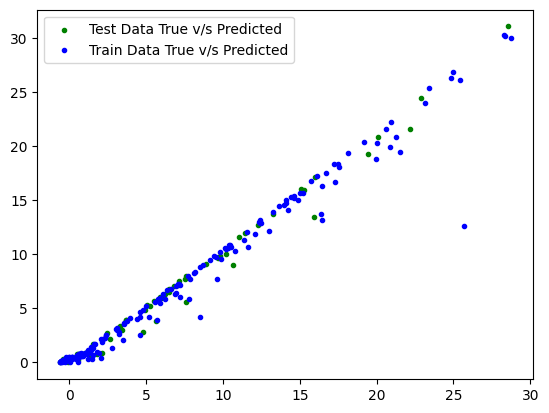

In [24]:
plotter.scatter(Y_Test_Predicted, Y_Test, marker = '.', color = 'green', label = 'Test Data True v/s Predicted')
plotter.scatter(Y_Train_Predicted, Y_Train, marker = '.', color = 'blue', label = 'Train Data True v/s Predicted')
plotter.legend()
plotter.show()